In [5]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

def analyzePicture(picNo):
    path = "img/teile_second/"
    if picNo < 10:
        path += "000"
    elif picNo < 100:
        path += "00"
    elif picNo < 1000:
        path += "0"
    else:
        path = path
    path += str(picNo) + ".jpg"
    
    img = cv2.imread(path)
    h,w = img.shape[0:2]
    #base[5:h+5,5:w+5]=img
    #img = base
    img2 = np.zeros((h+6,w+6, 3), dtype=np.uint8)
    img2 = cv2.bitwise_not(img2)
    img2[3:h+3,3:w+3] = img
    
    gray   = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    h,w = gray.shape[0:2]
    base_size = h+2, w+2
    base = np.zeros(base_size, dtype=np.uint8)
    thresh = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY)[1]
    
    cv2.floodFill(thresh, base, (0,0), 255)
    thresh = base
    
    plt.imshow(thresh)
    plt.show()
    contours, hierarchy = cv2.findContours(thresh,cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE) 
    
    h,w = thresh.shape[0:2]
    img2 = np.zeros((h+6,w+6, 3), dtype=np.uint8)
    img2 = cv2.bitwise_not(img2)
    img = cv2.imread(path)
    h,w = img.shape[0:2]
    img2[4:h+4,4:w+4] = img
    image = img2.copy()
    cont = len(contours)-1
    cv2.drawContours(img2, contours, cont , (0, 0, 255), 1) 
    plt.imshow(img2)
    plt.show()
    
    corners = cv2.goodFeaturesToTrack(thresh,20,0.1,10)
    corners = np.int0(corners)
    
    
    for i in corners:
        x,y = i.ravel()
        cv2.circle(image,(x,y),1,255,-1)
    plt.imshow(image)
    plt.show
    cv2.imwrite("img/tempImg/"+str(picNo)+".jpg", img2)

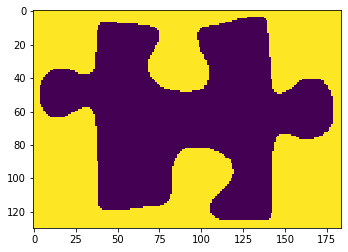

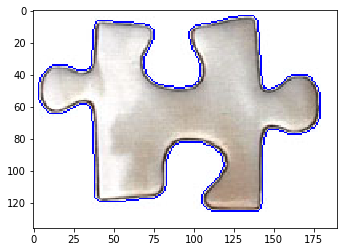

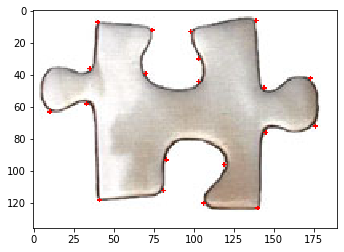

In [6]:
#for x in range(1,1008):
#    analyzePicture(x)

analyzePicture(1)